<a href="https://colab.research.google.com/github/Jash-Bhatia/Machine_Learning/blob/master/UCML_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
x_train = pd.read_csv('/content/arcene_train_data.csv', header = None)
y_train = pd.read_csv('/content/arcene_train_labels.csv', header=None)
x_val = pd.read_csv('/content/arcene_valid.csv', header = None)
y_val = pd.read_csv('/content/arcene_valid_labels.csv', header = None)
x_test = pd.read_csv('/content/arcene_test_data.csv', header = None)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)

(100, 10000)
(100, 1)
(100, 10000)
(100, 1)
(700, 10000)


In [3]:
y_train.replace(-1,0, inplace=True)
y_val.replace(-1,0,inplace=True)

In [4]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,71,0,95,0,538,404,20,0,0,0,0,17,0,239,0,0,0,0,0,0,0,30,0,89,262,0,147,389,0,0,103,19,9,2,0,0,0,0,0,...,0,291,0,0,19,0,162,54,23,0,0,0,378,0,0,0,0,0,52,0,294,168,0,0,0,222,0,0,0,0,255,570,86,0,36,0,80,0,0,524
1,0,41,82,165,60,554,379,0,71,0,0,0,0,34,364,0,0,0,1,7,0,0,0,0,110,263,0,180,564,0,0,139,0,45,0,0,0,0,11,0,...,0,267,0,69,0,32,19,96,4,35,0,0,411,0,0,0,0,0,105,19,320,213,0,0,66,243,0,63,63,30,213,605,69,7,473,0,57,0,284,423
2,0,0,1,40,0,451,402,0,0,0,0,0,15,0,269,0,0,0,0,0,0,0,14,0,121,278,0,198,494,0,0,103,3,8,0,0,0,0,0,0,...,0,313,0,0,1,5,0,23,0,0,0,0,409,0,0,0,0,0,68,0,342,157,0,0,13,245,0,14,1,0,235,593,28,0,24,0,90,0,34,508
3,0,56,44,275,14,511,470,0,0,0,0,0,0,69,270,0,0,0,55,0,0,0,34,0,221,259,0,134,435,0,0,66,28,0,30,0,0,0,13,0,...,0,230,0,0,0,24,54,12,0,0,0,0,357,0,0,0,0,0,58,0,346,146,0,0,0,237,0,26,26,18,91,600,0,26,86,0,102,0,0,469
4,105,0,141,348,0,268,329,0,0,1,0,0,23,0,312,17,0,0,322,0,0,0,0,2,265,128,0,86,428,60,0,200,0,34,0,0,0,4,0,0,...,0,117,0,96,67,0,0,83,0,0,14,0,256,0,79,93,0,0,29,0,71,126,0,0,240,134,140,1,0,0,813,0,0,0,0,190,301,0,0,354


In [5]:
y_train= np.array(y_train).reshape(len(y_train),)
y_val= np.array(y_val).reshape(len(y_val),)
y_train

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

# PCA 

In [6]:
pca1 = PCA(30)
pca1.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
print(pca1.components_.shape)

(30, 10000)


In [8]:
print(pca1.explained_variance_)

[28402558.42409751 14181093.22316859  3456836.91269706  2011267.42172635
  1492453.31639681  1263688.67525423  1176785.39651747   794520.47664412
   716308.59560058   582903.09633981   481520.42346532   424374.16325015
   410297.11129308   346416.00167769   330447.75169523   306599.66272049
   277109.91740987   257646.49212091   228518.62292843   209235.76906641
   205127.99516622   182181.28160335   172215.52191898   165984.00673801
   156558.33740843   152668.89462099   139199.49210784   133441.81291144
   131705.56792561   124481.34503916]


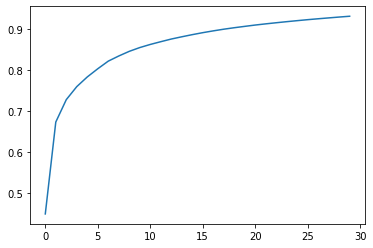

In [9]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))  ##graph shows that 90% variablity is roughly captured in 20 variables 

In [10]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.44859537, 0.67257423, 0.72717217, 0.7589385 , 0.78251059,
       0.80246953, 0.8210559 , 0.83360471, 0.84491822, 0.8541247 ,
       0.86172993, 0.86843257, 0.87491288, 0.88038424, 0.8856034 ,
       0.89044589, 0.89482261, 0.89889193, 0.9025012 , 0.90580591,
       0.90904574, 0.91192314, 0.91464315, 0.91726473, 0.91973744,
       0.92214872, 0.92434727, 0.92645487, 0.92853505, 0.93050114])

In [11]:
x_train_pca1 = pca1.fit_transform(x_train)
x_val_pca1 = pca1.transform(x_val)
x_test_pca1 = pca1.transform(x_test)

print(x_train_pca1.shape)

(100, 30)


## logistic regression


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logi = LogisticRegression(random_state=0)
logi.fit(x_train_pca1,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_val_pred = logi.predict(x_val_pca1)

In [15]:
y_test_pred = logi.predict(x_test_pca1)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_val_pred)
print(cm)
accuracy_score(y_val, y_val_pred)

[[49  7]
 [13 31]]


0.8

## Neural Network

In [17]:
from keras import layers
from keras import models
from keras.utils import to_categorical

In [18]:
y_train_nn = to_categorical(y_train)
y_val_nn = to_categorical(y_val)

y_train

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [23]:
nn1 = models.Sequential()

nn1.add(layers.Dense(units = 32, activation='relu', input_shape = (30,)))
nn1.add(layers.Dense(units = 64, activation='relu'))
nn1.add(layers.Dropout(0.5))
nn1.add(layers.Dense(units=1, activation='sigmoid'))

nn1.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
nn1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________


In [24]:
nn1.fit(x = x_train_pca1, y = y_train, batch_size=5, epochs=30, validation_data=(x_val_pca1, y_val))

Epoch 1/30
20/20 [==============================] - 0s 8ms/step - loss: 328.6294 - accuracy: 0.4800 - val_loss: 78.5483 - val_accuracy: 0.7200
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 293.2547 - accuracy: 0.4800 - val_loss: 71.4051 - val_accuracy: 0.7100
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 214.2460 - accuracy: 0.5400 - val_loss: 53.0053 - val_accuracy: 0.7100
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 290.2962 - accuracy: 0.5300 - val_loss: 45.5781 - val_accuracy: 0.7800
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 162.7554 - accuracy: 0.6700 - val_loss: 42.7816 - val_accuracy: 0.7900
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 168.6856 - accuracy: 0.6400 - val_loss: 47.0974 - val_accuracy: 0.7600
Epoch 7/30
20/20 [==============================] - 0s 3ms/step - loss: 156.0528 - accuracy: 0.6500 - val_loss: 38.5743 - val_accuracy: 0.7900